18.0


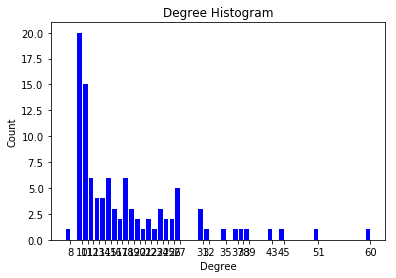

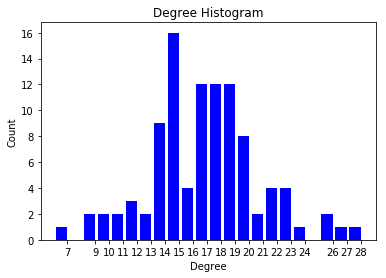

In [2]:
#8a
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import numpy as np
from pylab import *
import collections

Gba = nx.barabasi_albert_graph(100, 10)
avg_deg = sum(list(dict(Gba.degree()).values())) * 1.0 / nx.number_of_nodes(Gba)
print(avg_deg)
degree_sequence = sorted([d for n, d in Gba.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

#8b
Gnp = nx.gnp_random_graph(100, avg_deg * 1.0 / 99)
degree_sequence = sorted([d for n, d in Gnp.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()


In [45]:
#9
def two_deg_friend(g, node):
    deg_sum = 0
    if g.degree[node] > 0:
        for friend in g.neighbors(node):
            deg_sum += g.degree[friend]
        deg_sum = deg_sum / g.degree[node]
    return deg_sum 

gnp = nx.barabasi_albert_graph(100,10)
deg_sum = 0
for node in gnp.nodes():
    deg_sum += two_deg_friend(gnp, node)
print(deg_sum / 100)

23.81389838544168


In [5]:
#11a
GoogleWeb = nx.read_edgelist("/Users/kuhukgoyal/Downloads/web-Google.txt")


In [10]:
giant = max(nx.connected_component_subgraphs(GoogleWeb), key=len)


In [40]:
giant_num = giant.number_of_nodes()
frac_size = giant_num / GoogleWeb.number_of_nodes()
print("Fractional Size:", frac_size)
rand_nodes_1 = []
for _ in range(0,100):
    node_to_add = choice(list(giant.nodes()))
    rand_nodes_1.append(node_to_add)
rand_nodes_2 = []
for _ in range(0,100):
    node_to_add = choice(list(giant.nodes()))
    rand_nodes_2.append(node_to_add)
clstr_lst = []
for node in rand_nodes_1:
    clstr_lst.append(nx.clustering(giant, node))
print("Clustering Coefficient:", np.mean(clstr_lst))
apl_lst = []
rand_node_pairs = zip(rand_nodes_1, rand_nodes_2)
for pair in rand_node_pairs:
    apl_lst.append(nx.shortest_path_length(giant, source=pair[0], target=pair[1]))
print("Average Shortest Path Length:", np.mean(apl_lst))


Fractional Size: 0.9772630987549574
Clustering Coefficient: 0.5471459340258317
Average Shortest Path Length: 6.39


In [6]:
m = GoogleWeb.number_of_edges()
n = GoogleWeb.number_of_nodes()
print("number of edges:", m)
print("number of nodes:", n)
p = (2*m)/(n*(n-1))

number of edges: 4322051
number of nodes: 875713


In [7]:
#11b
rand_G = nx.fast_gnp_random_graph(n,p)
giant = max(nx.connected_component_subgraphs(rand_G), key=len)
giant_num = giant.number_of_nodes()
frac_size = giant_num / rand_G.number_of_nodes()
print("Rand Fractional Size:", frac_size)
rand_nodes_1 = []
for _ in range(0,100):
    node_to_add = choice(list(giant.nodes()))
    rand_nodes_1.append(node_to_add)
rand_nodes_2 = []
for _ in range(0,100):
    node_to_add = choice(list(giant.nodes()))
    rand_nodes_2.append(node_to_add)
clstr_lst = []
for node in rand_nodes_1:
    clstr_lst.append(nx.clustering(giant, node))
print("Rand Clustering Coefficient:", np.mean(clstr_lst))
apl_lst = []
rand_node_pairs = zip(rand_nodes_1, rand_nodes_2)
for pair in rand_node_pairs:
    apl_lst.append(nx.shortest_path_length(giant, source=pair[0], target=pair[1]))
print("Rand Average Shortest Path Length:", np.mean(apl_lst))

Rand Fractional Size: 0.9999486133013898
Rand Clustering Coefficient: 0.0
Rand Average Shortest Path Length: 6.32
